In [28]:
#第一课 BSM 公式即通过蒙特卡洛方式模拟估计欧式看涨期权价值。


import numpy as np

import matplotlib.pyplot as plt

S0 = 100. #当前股票价格
K = 105. #行权价
T = 1.0 #一年时间
r = 0.05 #固定无风险短期一年利率
sigma = 0.2 #固定波动率 20%

I = 100000  #为随机路径个数

z = np.random.standard_normal(I)   #每天有10000个变化数值

#根据BSM(1973)公式，简单计算T时间之后的股票价格ST，有I个价格
ST = S0 * np.exp((r - 0.5 * sigma * sigma) * T + sigma * np.sqrt(T) * z)
#计算到期期权的所有内在价值
hT = np.maximum(ST-K, 0)
#欧式期权的蒙特卡洛估算函数，求得期权当前的价值
C0 = np.exp(-r * T) * np.sum(hT) / I

print("value of european call option %5.3f" %(C0))




value of european call option 8.017


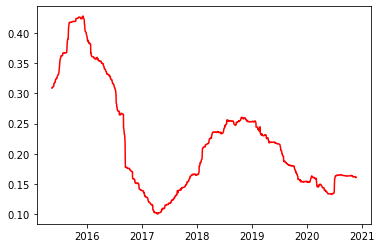

In [47]:
#第二课 
#计算某个标的证券的波动率
import numpy as np
import pandas as pd
from datetime import datetime
#step1 ： 加载数据
df =pd.read_csv("./分析股票行情/601398_1d.csv")
df['date']= df['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
#step2:  计算标的波动率，所谓波动率实际上是收益的标准差
df['Log_Ret']=np.log(df['close'] / df['close'].shift(1))
df['Volatility'] = df['Log_Ret'].rolling(252).std() * np.sqrt(252)

#step3:  绘制数据
%matplotlib inline
#df[['close','Volatility']].plot()

#plt.plot(df['date'],df['close'],'blue')
plt.plot(df['date'],df['Volatility'],'r')



In [52]:
# 第三课
#尽量使用库，性能高很多
from math import *
loops = 100000
a = range(1, loops)
def f(x):
    return 3*log(x) + cos(x)**2
%timeit r = [f(x) for x in a]


import numpy as np
a = np.arange(1, loops)
%timeit r = 3 *np.log(a) + np.cos(a)**2





58.2 ms ± 935 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.96 ms ± 9.63 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
#第四课
#隐含波动率
#根据BSM(1973)定价公式